<a href="https://colab.research.google.com/github/AmirRazaMBA/TF_786/blob/main/2.%20Convolutional%20Neural%20Network%20in%20Tensorflow/AZ/04_horse-or-human_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf

In [ ]:
# using wget
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  

In [2]:
# using python code

URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
# filename = "c:\\Sandbox\\GitHub\\TF_786\\horse-or-human.zip"   # windows
filename = "/content/horse-or-human.zip"                         # unix

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname=filename,
                                   extract=True)


URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
# filename = "c:\\Sandbox\\GitHub\\TF_786\\validation-horse-or-human.zip"   # windows
filename = "/content/validation-horse-or-human.zip"                         # unix

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname=filename,
                                   extract=True)

11485184/11480187 [==============================] - 0s 0us/step


In [4]:
filepath = '/content/'
local_zip = filepath + 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(filepath + 'horse-or-human')
local_zip = filepath + 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(filepath + 'validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join(filepath + 'horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join(filepath + 'horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join(filepath + 'validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join(filepath + 'validation-horse-or-human/humans')

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        filepath + 'horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        filepath + 'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 0.6872 - acc: 0.5206 - val_loss: 0.6723 - val_acc: 0.5625
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6738 - acc: 0.5895 - val_loss: 0.6496 - val_acc: 0.6680
Epoch 3/100
8/8 [==============================] - 18s 2s/step - loss: 0.6853 - acc: 0.6085 - val_loss: 0.6271 - val_acc: 0.7148
Epoch 4/100
8/8 [==============================] - 18s 2s/step - loss: 0.6227 - acc: 0.7208 - val_loss: 0.6687 - val_acc: 0.5117
Epoch 5/100
8/8 [==============================] - 18s 2s/step - loss: 0.5923 - acc: 0.7219 - val_loss: 0.5547 - val_acc: 0.7773
Epoch 6/100
8/8 [==============================] - 21s 3s/step - loss: 0.5710 - acc: 0.7308 - val_loss: 0.7661 - val_acc: 0.5273
Epoch 7/100
8/8 [==============================] - 18s 2s/step - loss: 0.6007 - acc: 0.6618 - val_loss: 0.8595 - val_acc: 0.5039
Epoch 8/100
8/8 [====

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [16]:
model.metrics_names

['loss', 'acc']

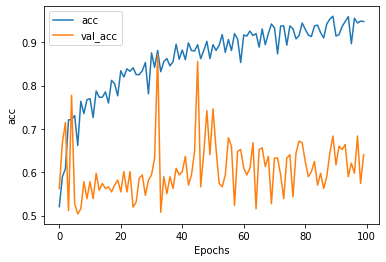

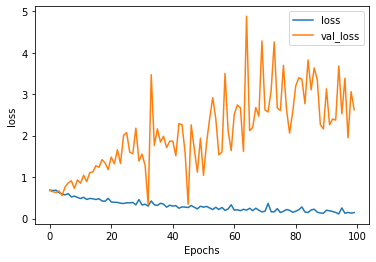

In [17]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")